In [87]:
import numpy as np
import pickle, os, glob
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.optim as optim
from train import *
from model import *

Epoch 177: Train loss=10159.06906790722; Test loss=10313.349693080358


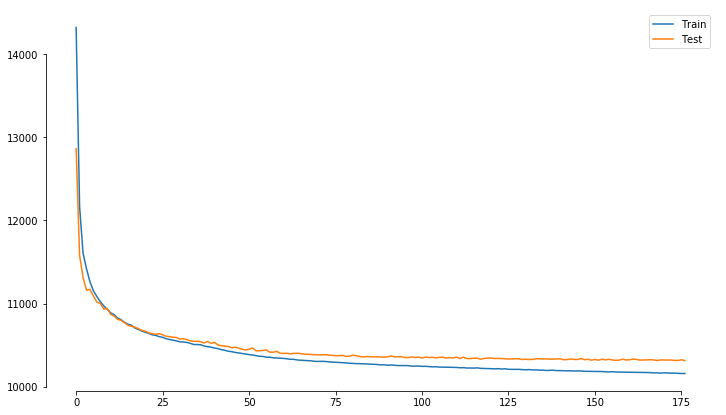

In [172]:
def plot_latest_loss(loss_dir, savename):
    losses = sorted(glob.glob(loss_dir + '/*' + savename +'*'), key=os.path.getmtime)
    
    with open(losses[-1], 'rb') as f:
        x = pickle.load(f)
    train_loss = [x[0][i][1] for i in range(len(x[0]))]
    test_loss = [x[1][i][1] for i in range(len(x[1]))]

    fig = plt.figure(figsize=(12,7));
    plt.plot(np.arange(len(x[0])), train_loss);
    plt.plot(np.arange(len(x[1])), test_loss);
    plt.legend(['Train', 'Test'])
    sns.despine(trim=True)
    print(f'Epoch {len(x[0])}: Train loss={train_loss[-1]}; Test loss={test_loss[-1]}')
    return train_loss, test_loss

plot_latest_loss('losses', 'v13_beta4_z32');

In [92]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
def get_latest_checkpoint(checkpoint_dir, savename):
    model = BetaVAE(latent_size=32, beta=4).to(device)
    optimizer = optim.Adam(model.parameters(), lr=1e-5, eps=1e-4)
    last_epoch = load_latest_model(checkpoint_dir, savename, model, optimizer)
    return model, optimizer, last_epoch

model, optimizer, epoch = get_latest_checkpoint('checkpoints', 'v13_beta4_z32')

Found a previous checkpoint saved at: checkpoints/betavae_v13_beta4_z32_e176.pt. Resuming training...


/Users/akshay/proj/beta_vae/model.py:104: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  init.kaiming_normal(m.weight)
/Users/akshay/proj/beta_vae/model.py:104: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  init.kaiming_normal(m.weight)
/Users/akshay/proj/beta_vae/model.py:104: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  init.kaiming_normal(m.weight)


In [94]:
train_loader, test_loader = get_data_loader('animals', batch_size=50, imsize=256)

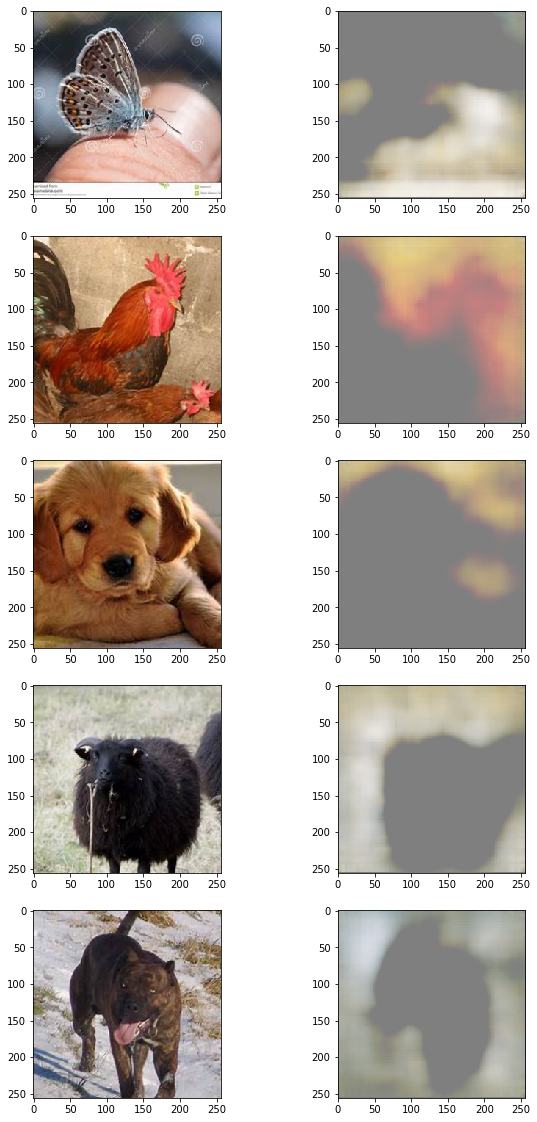

In [146]:
def plot_orig_recon_images(test_loader, nImages=5):
    image, label = next(iter(test_loader))
    out, mu, logvar = model(image)
    
    fig, axes = plt.subplots(nImages, 2, figsize=(10,20))
    for i in range(nImages):
        img = np.moveaxis(image[i].cpu().numpy(), 0, -1)
        out_img = np.moveaxis(out[i].cpu().detach().numpy(), 0, -1)
        axes[i,0].imshow(img); 
        axes[i,1].imshow(out_img);
plot_orig_recon_images(test_loader)

In [147]:
image, label = next(iter(test_loader))
mu,logvar = model.encode(image)
z = model.sample(mu, logvar)

(-0.5, 255.5, 255.5, -0.5)

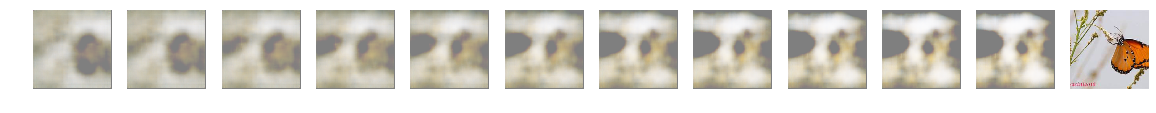

In [171]:
fig,axes = plt.subplots(1,12,figsize=(20,5))
rx = model.decode(z)
idx=12
dim=3
axes[0].imshow(np.moveaxis(rx[idx].cpu().detach().numpy(), 0, -1))
axes[0].axis('off')
for i in range(10):
    z1 = z.clone().detach()
    z1[idx,dim] = z[idx,dim] + 1*(i+1)
    rx1 = model.decode(z1)
    axes[i+1].imshow(np.moveaxis(rx1[idx].cpu().detach().numpy(), 0, -1))
    axes[i+1].axis('off')
axes[-1].imshow(np.moveaxis(image[idx].cpu().numpy(), 0, -1))
axes[-1].axis('off')


torch.Size([50, 32])